In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [11]:
x = df.iloc[:,1:4].values
y =df.iloc[:,4].values

In [20]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=40)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pre = knn.predict(x_test)
print(y_pre)

[0 1 2 2 1 2 2 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0 2 0 0 1 2 2 2]


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pre)

In [29]:
cm

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 15]], dtype=int64)

In [30]:
accuracy = accuracy_score(y_test,y_pre)
print("Accuracy:",round(accuracy*100),"%")

Accuracy: 98.0 %


In [31]:
from sklearn import metrics
score=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pre = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pre))
print(score)

[1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


Text(0, 0.5, 'Testing Accuracy')

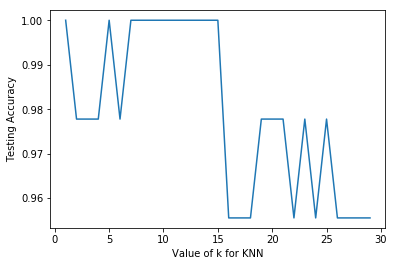

In [33]:
import matplotlib.pyplot as plt
%matplotlib  inline
plt.plot(range(1,30),score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')